<h1>Exercice : Prédiction de la Similarité de Logos (176 Paires)</h1>

<h2>Objectif</h2>
<p>
  Cet exercice vise à évaluer la capacité à manipuler des données visuelles, à extraire des représentations vectorielles (embeddings)
  et à entraîner un modèle d'apprentissage automatique ou de deep learning pour prédire la similarité entre deux logos à partir de leurs images.
  Il permet de tester des compétences en vision par ordinateur, en prétraitement d'images, en extraction de caractéristiques et en modélisation.
</p>

<h2>I. Description Générale</h2>
<p>
  Vous disposez d’un ensemble de <strong>176 paires de logos</strong>. Pour chaque paire, les données suivantes sont fournies :
</p>
<ul>
  <li><strong>Main Mark Image</strong> : Chemin d'accès à l’image du logo principal.</li>
  <li><strong>Earlier Mark Image</strong> : Chemin d'accès à l’image du logo antérieur.</li>
  <li><strong>Similarité</strong> : Annotation indiquant si les logos sont considérés comme "similaires" ou "dissimilares".</li>
</ul>

<p>Le fichier CSV est structuré comme suit :</p>
<pre>
main_mark_image,earlier_mark_image,similarity
logos_dataset/main_002389831.JPG,logos_dataset/earlier_000665737.TIF,similar
logos_dataset/main_003286325.JPG,logos_dataset/earlier_002856367.TIF,similar
logos_dataset/main_017503343.JPG,logos_dataset/earlier_014009872.JPG,dissimilar
</pre>

<h2>II. Tâches à Réaliser</h2>
<ol>
  <li>
    <strong>Installation et Chargement des Dépendances</strong>
    <ul>
      <li>Utiliser Python et les librairies suivantes :</li>
      <li><strong>Manipulation des données</strong> : numpy, pandas, scikit-learn</li>
      <li><strong>Traitement d'images</strong> : OpenCV, PIL</li>
      <li><strong>Deep Learning</strong> : PyTorch (préféré) ou TensorFlow</li>
    </ul>
  </li>

  <li>
    <strong>Exploration et Vérification des Données</strong>
    <ul>
      <li>Charger le fichier CSV et afficher un aperçu des données.</li>
      <li>Vérifier la validité des chemins et l’existence des fichiers d’images.</li>
      <li>Visualiser quelques paires de logos.</li>
    </ul>
  </li>

  <li>
    <strong>Pipeline de Prétraitement</strong>
    <p>
      Quel type de prétraitement suggérez-vous pour uniformiser et préparer les images ?
      (Par exemple : redimensionnement, normalisation, conversion en niveaux de gris ou en RGB,
      ou encore augmentation de données.)
    </p>
  </li>

  <li>
    <strong>Extraction de Caractéristiques</strong>
    <ul>
      <li>
        <strong>Méthodes Classiques :</strong>
        <ul>
          <li>Histogramme des couleurs, Moments de Hu...ect(une seul méthode)</li>
          <li>Extraction des points d'interets avec SIFT, SURF ou ORB.</li>
          <li>Matching de points d'interets pour visualiser la similarité. (une seul méthode)</li>
        </ul>
      </li>
      <li>
        <strong>Approche Deep Learning :</strong>
        <ul>
          <li>Utiliser un modèle pré-entraîné (ResNet, VGG, EfficientNet).</li>
        </ul>
      </li>
    </ul>
  </li>

  <li>
    <strong>Exploration des Embeddings</strong>
    <ul>
      <li>
        À partir des caractéristiques extraites (méthodes classiques ou approches deep learning),
        sélectionner <strong>3 embeddings</strong> de <code>main_mark_image</code> au hasard.
      </li>
      <li>
        Calculer la distance entre ces embeddings et ceux de toutes les autres images du dataset.
      </li>
      <li>
        Afficher les <strong>5 logos</strong> les plus similaires pour chacune des 3 images principales
        afin de valider la pertinence des descripteurs.
      </li>
    </ul>
  </li>

  <li>
    <strong>Classification</strong>
    <ul>
      <li>Entraîner un modèle (SVM, régression logistique,KNeighborsClassifie, MLP) pour classifier les paires.</li>
    </ul>
  </li>

  <li>
    <strong>Entraînement et Validation</strong>
    <ul>
      <li>Séparer les données en 140 paires d’entraînement et 36 de test.</li>
      <li>Évaluer les performances (accuracy, F1-score, courbe ROC, etc.).</li>
    </ul>
  </li>

  <li>
    <strong>Analyse et Présentation des Résultats</strong>
    <ul>
      <li>Justifier les choix techniques et comparer les approches.</li>
      <li>Montrer des exemples de classifications correctes et incorrectes.</li>
    </ul>
  </li>
</ol>

<h2>III. Questions Complémentaires</h2>
<ul>
  <li>Pourquoi est-il nécessaire d’uniformiser la taille des images avant de les passer à un modèle de deep learning ?</li>
  <li>Quels sont les avantages et inconvénients d’un CNN par rapport aux descripteurs classiques ?</li>
  <li>Pourquoi certaines méthodes comme SIFT sont-elles plus adaptées pour la reconnaissance de logos ?</li>
  <li>Comment une augmentation des données pourrait-elle améliorer les performances du modèle ?</li>
  <li>Comment améliorer les embeddings pour optimiser la classification ?</li>
</ul>




In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from PIL import Image
import cv2

csv_file = "extracted_paths_final_LIPSTIP.csv"  

# Read CSV file into DataFrame.
df = pd.read_csv(csv_file)

# Display the first 10 rows.
df.head(10)


,main_mark_image,earlier_mark_image,similarity
0,logos_dataset/main_002389831.JPG,logos_dataset/earlier_000665737.TIF,similar
1,logos_dataset/main_003286325.JPG,logos_dataset/earlier_002856367.TIF,similar
2,logos_dataset/main_004168753.JPG,logos_dataset/earlier_001834738.TIF,similar
3,logos_dataset/main_003771862.JPG,logos_dataset/earlier_003412285.JPG,similar
4,logos_dataset/main_003771862.JPG,logos_dataset/earlier_002979581.JPG,similar
5,logos_dataset/main_004001641.JPG,logos_dataset/earlier_002403012.TIF,similar
6,logos_dataset/main_003966983.JPG,logos_dataset/earlier_002091783.TIF,similar
7,logos_dataset/main_004009353.JPG,logos_dataset/earlier_000041210.TIF,similar
8,logos_dataset/main_001688415.TIF,logos_dataset/earlier_001129758.TIF,similar
9,logos_dataset/main_002576544.JPG,logos_dataset/earlier_000337337.TIF,similar


In [14]:
# Count occurrences of each unique value in the "similarity" column.
similarity_counts = df["similarity"].value_counts()

# Print the counts.
print("\nCount of unique values in 'similarity' column:")
print(similarity_counts)


Count of unique values in 'similarity' column:
similarity
Disimilar    100
similar       76
Name: count, dtype: int64


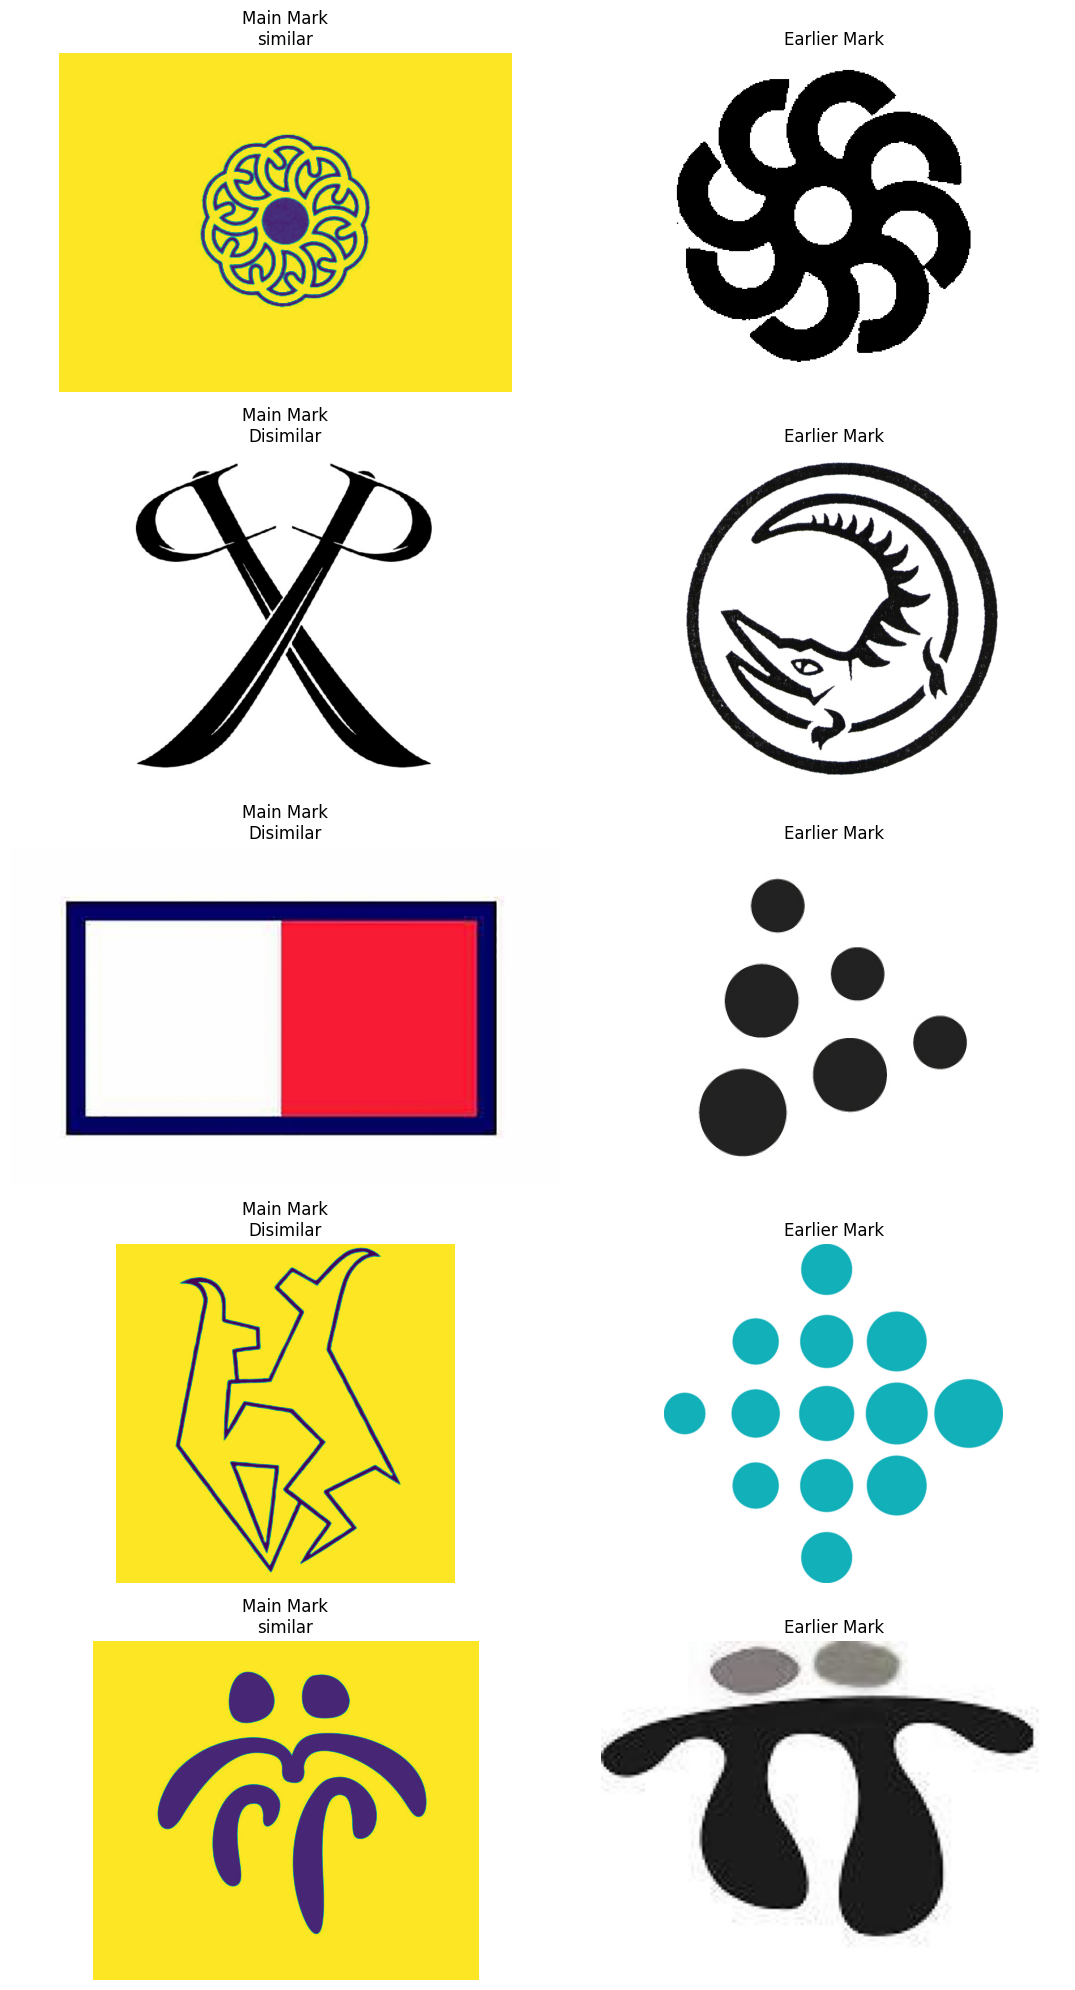

In [15]:
# Filter out rows with missing image paths
df = df.dropna(subset=["main_mark_image", "earlier_mark_image"])

# Select 5 random pairs
sample_df = df.sample(n=5, random_state=None)

# Create a figure with 5 rows and 2 columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

# Loop through selected rows and plot images
for i, (_, row) in enumerate(sample_df.iterrows()):
    main_image_path = row["main_mark_image"]
    earlier_image_path = row["earlier_mark_image"]
    similarity_label = row["similarity"]  # Get the similarity label
    
    # Load images
    try:
        main_img = Image.open(main_image_path)
    except Exception as e:
        print(f"Error opening main image '{main_image_path}': {e}")
        main_img = None

    try:
        earlier_img = Image.open(earlier_image_path)
    except Exception as e:
        print(f"Error opening earlier image '{earlier_image_path}': {e}")
        earlier_img = None

    # Plot main mark image on the left
    ax_main = axes[i, 0]
    if main_img:
        ax_main.imshow(main_img)
        ax_main.set_title(f"Main Mark\n{similarity_label}")  # Show label
    else:
        ax_main.text(0.5, 0.5, "Image not found", ha="center", va="center")
    ax_main.axis("off")

    # Plot earlier mark image on the right
    ax_earlier = axes[i, 1]
    if earlier_img:
        ax_earlier.imshow(earlier_img)
        ax_earlier.set_title("Earlier Mark")
    else:
        ax_earlier.text(0.5, 0.5, "Image not found", ha="center", va="center")
    ax_earlier.axis("off")

# Adjust layout and display
plt.tight_layout()
plt.show()

🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽🔽

C'est a vous !!!!!!!!!!!!!👇